# Visualizing CIFAR100 Class Partitioning with Flower

This notebook demonstrates how the Flower framework partitions the CIFAR100 dataset into multiple clients using the IID (Independent and Identically Distributed) partitioner. The bar chart below shows the distribution of coarse labels (superclasses) across each partition, helping to visualize the balance and allocation of data among clients.

/home/einrich99/anaconda3/envs/ml_flower/lib/python3.12/site-packages/flwr_datasets/visualization/comparison_label_distribution.py:222: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


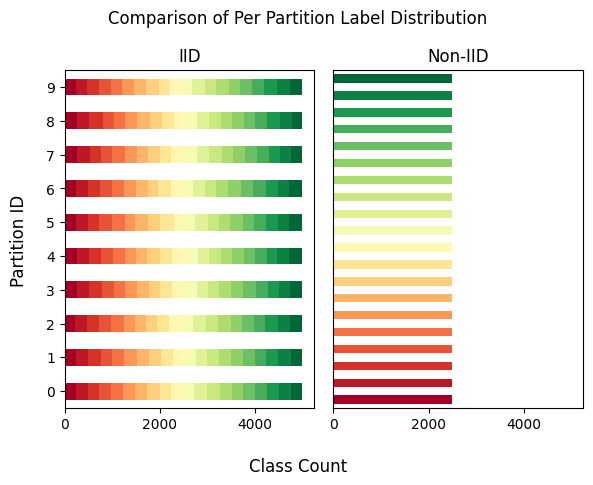

In [ ]:
from numpy import partition
import torch
import torch.nn as nn
import torch.nn.functional as F
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, PathologicalPartitioner
from flwr_datasets.visualization import plot_comparison_label_distribution

# You can vary the partitioner to see the effects

iid = IidPartitioner(num_partitions=10)

non_iid = PathologicalPartitioner(
    num_partitions=20,
    partition_by="coarse_label",
    num_classes_per_partition=2,
    class_assignment_mode="deterministic",  # deterministic to comply with eventual checkpoints
    shuffle=False,
    seed=42,
)

partitioner_list = []

fds = FederatedDataset(
    dataset="uoft-cs/cifar100",
    partitioners={"train": iid},
)

partitioner_list.append(fds.partitioners["train"])

fds = FederatedDataset(
    dataset="uoft-cs/cifar100",
    partitioners={"train": non_iid},
)

partitioner_list.append(fds.partitioners["train"])

# for each sample, the CIFAR-100 offer three fields: img (for the image obj), fine_label (100 labels) and coarse_label (20 labels)
fig, ax, df = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="coarse_label",  # here coarse_label is set instead of fine_label to better visualize the partitioner at work
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="y",
    legend=False,
    verbose_labels=True,
    titles=["IID", "Non-IID"],
)